# Introduction

This notebook implements no-linear least squears models for diferent stock prices thorugh a time not too distant

# Related with the nature of the data, which conditions should meet matrices $A$ and $b$ to be solvable from the least squares perspective?

This system has a solution if b belong to the colum space of A, but normally this is not the case and we can only find an approximate solution

The least squares problem always has a solution. The solution is unique if
and only if A has linearly independent columns or what is equivalent $A^TA$ is invertible

# Use a least squares for non-linear models adjust the bitcoin price and perform a prediction using the model to determine the future daily price a week ahead, compare with the actual values.

We import data of Bitcoin prices of past weeks

In [68]:
using CSV
using DataFrames

dataBitcoin = CSV.read("Bitcoin.csv",DataFrame);
dataBitcoin.Price .= replace.(dataBitcoin.Price, "," => "");
dataBitcoin.PriceFloat = parse.(Float64, dataBitcoin.Price);

We implement a non-linear function(cuadratic)model using least squares

Prediction of 7 days ahead: 
[45230.625232621795, 45782.26801313631, 46359.82275756133, 46963.28946589687, 47592.66813814294, 48247.958774299506, 48929.16137436661]

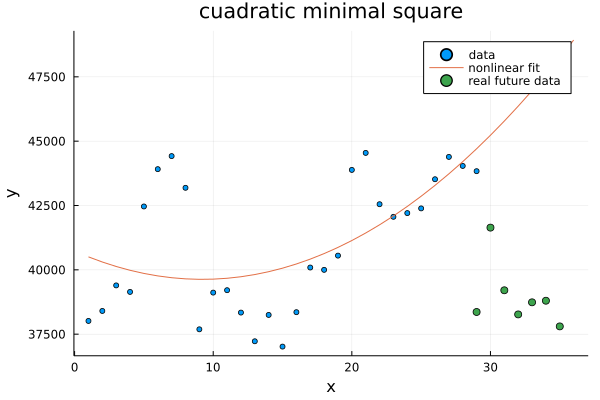

In [118]:
using LinearAlgebra
using Plots

function main()
    N = size(dataBitcoin.PriceFloat,1);
    A = Array((1:N));
    xdata = A #x data will be de 29 days of history prices
    ydata2=[38362.62,41640.78,39205.73,38268.40,38738.49,38800.28,37802.68]#real values not predicted
    ydata = AbstractFloat[] #Y data will be de prices of bitcoin that 29 days 
    aux = dataBitcoin.Price
    xlin = range(xdata[1], 36)#number of days(we predict 7 days)
    for i = 1:N
     append!(ydata,parse(Float64, aux[i]))
    end
    cms(xdata,ydata,xlin,1,29)
    plot!([29,30,31,32,33,34,35],ydata2,seriestype = :scatter,label="real future data") #We plot the predict data

end

function cms(xdata, ydata,xlin,p,N) #cuadratic_minimal_square
    A =[xdata[i]^j for i in 1:N, j in 0:2]
    betaHat = pinv(A)*ydata #Using the Moore-Penrose pseudoinverse
    betaHat = A \ ydata  #Using the QR solution
    yHat(x) = betaHat'*[1,x,x^2]#model function
    scatter(xdata, ydata, markersize=3, legend=:topright, label="data")
    yEst = yHat.(xlin);#all values of model 
    plot!(xlin,yEst,label="nonlinear fit") #we plot the model function
    if p==1   #we print The 7 day ahead prices
     print("Prediction of 7 days ahead: \n",yEst[30:36])
    end
    xaxis!("x")
    yaxis!("y")
    title!("cuadratic minimal square")
    return yEst


end


main()

I conclude that my predict model was not to good but was it was still not very far from the average price of bitcoin

# Use least squares to determine the relationship between the bitcoin price and prices of three comodities namely, oil, silved and gold, during the last year

We gonna use the last year data Prices of oil,silved,gold and bitcoin by an average of 12 months

In [102]:
using CSV
using DataFrames

Prices = CSV.read("Prices.csv",DataFrame);


I will use the last function(non-linear) to modelate the last year prices of oil,gold,silved vs bitcoin 

In [136]:
function cms2(xdata, ydata,xlin,N) #cuadratic_minimal_square
    A =[xdata[i]^j for i in 1:N, j in 0:2]
    betaHat = pinv(A)*ydata #Using the Moore-Penrose pseudoinverse
    betaHat = A \ ydata  #Using the QR solution
    yHat(x) = betaHat'*[1,x,x^2]#model
    yEst = yHat.(xlin);
    return yEst
end

cms2 (generic function with 2 methods)

Oil prices vs 0.01 BITCOIN PRICE IN LAST 12 MONTHS 

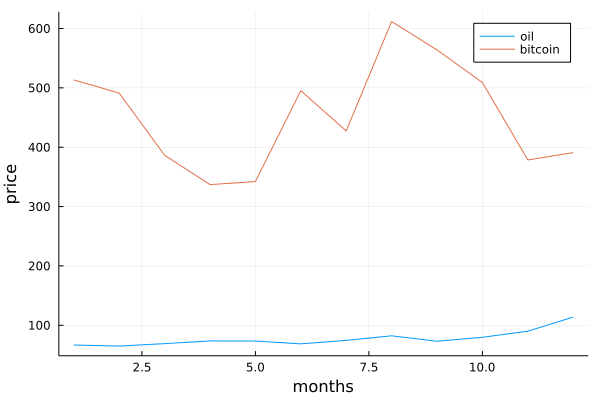

In [177]:
plot(Prices.OilPrice,label="oil")
plot!(Prices.BitcoinPrice/100,label="bitcoin") #PRICES OF  0.01BITCOIN IN LAST YEAR
xaxis!("months")
yaxis!("price")

In [147]:
N = size(Prices.OilPrice,1);
A = Array((1:N));
xdata = A

12-element Vector{Int64}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10
 11
 12

The 2 least-squeares models of 1 barril of oil and 0.05 bitcoin in 12 months 

we can see that first 3 monts while the price of bitcoin was encreasing the price oil was decreasing and about 3 to 7.5 months the oil price increase at the same time the bitcoin price increase and about 7.5 months to 12 months the oil price encrease while bitcoing prise decrease

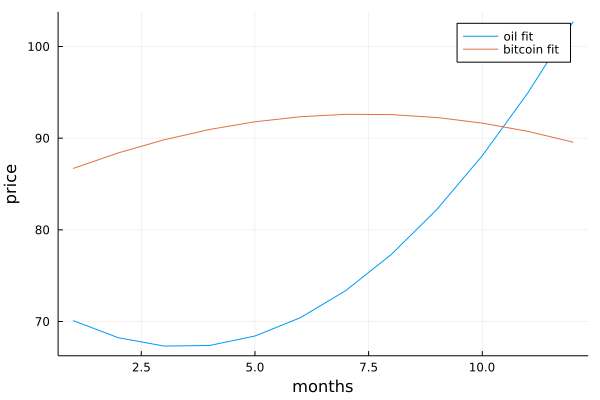

In [178]:

ydata=Prices.OilPrice
xlin=range(xdata[1], 12)#number of months
yEst=cms2(xdata,ydata,xlin,12)
yEst2=cms2(xdata,Prices.BitcoinPrice/500,xlin,12)#FIT PRICE OF 0.05 BITCOINS IN A HISTORY YEAR
plot(xlin,yEst,label="oil fit")
plot!(xlin,yEst2,label="bitcoin fit")
xaxis!("months")
yaxis!("price")


gold prices vs 0.1 BITCOIN PRICE IN LAST 12 MONTHS 

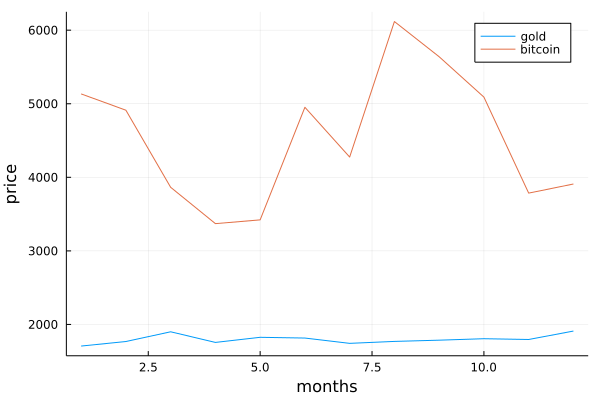

In [175]:
plot(Prices.GoldPrice,label="gold")
plot!(Prices.BitcoinPrice/10,label="bitcoin")#PRICES OF 0.1 BITCOINS IN LAST YEAR
xaxis!("months")
yaxis!("price")

The 2 least-squeares models of 1 oz of gold and 0.25 bitcoin in 12 months

we can see that first 7.5 months gold price encrease at the time bitcoin increase encrease and then while bitcoin price decrease gold price continue to grow



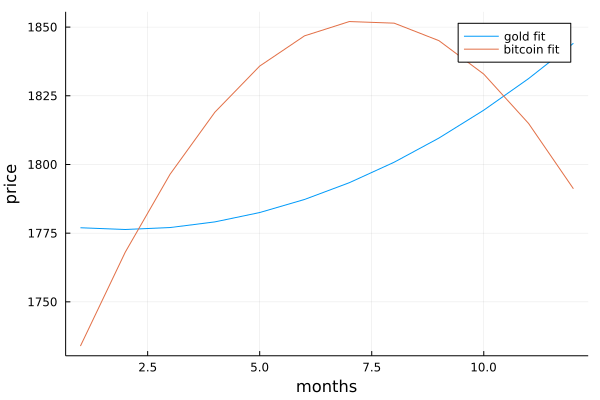

In [174]:
ydata=Prices.GoldPrice
xlin=range(xdata[1], 12)#number of months
yEst=cms2(xdata,ydata,xlin,12)
yEst2=cms2(xdata,Prices.BitcoinPrice/25,xlin,12)#FIT PRICE OF 0.25 BITCOINS IN A HISTORY YEAR
plot(xlin,yEst,label="gold fit")
plot!(xlin,yEst2,label="bitcoin fit")
xaxis!("months")
yaxis!("price")

1 oz Silved Price vs 0.001 bitcoins price

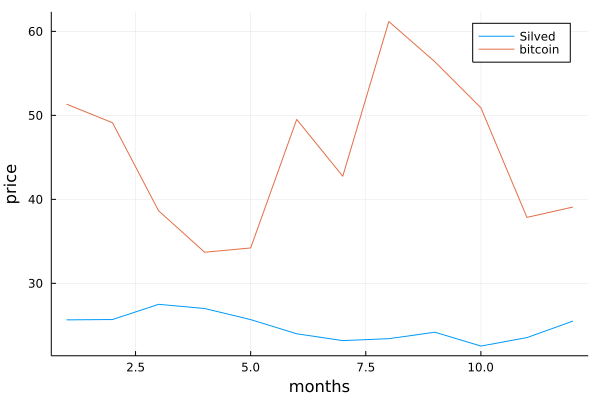

In [173]:
plot(Prices.SilvedPrice,label="Silved")
plot!(Prices.BitcoinPrice/1000,label="bitcoin")#PRICE OF 0.001 BITCOINS IN LAST YEAR
xaxis!("months")
yaxis!("price")

The 2 least-squeares models of 1 oz of silved and 0.0018 bitcoin in 12 months 

we can see that fist 7.5 months the 2 models where inversely proportional and then about 7.5 month to 10 month the price of bitcoin start decreasing and the silved price continue decreasing but in month 10 to 12 while bitcoin price start decreasing more fast the silver price started to increase

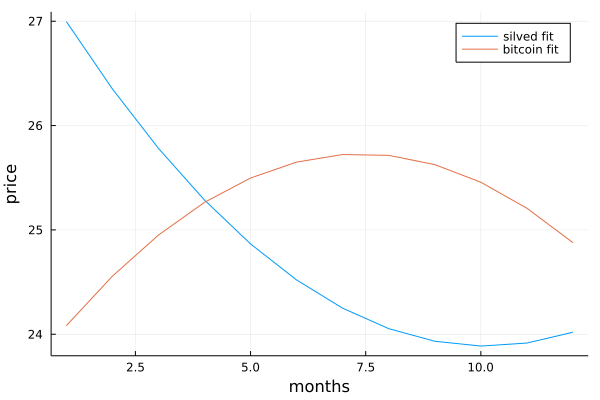

In [172]:
ydata=Prices.SilvedPrice
xlin=range(xdata[1], 12)#number of months
yEst=cms2(xdata,ydata,xlin,12)
yEst2=cms2(xdata,Prices.BitcoinPrice/1800,xlin,12)#FIT PRICE OF 0.0018 BITCOINS IN A HISTORY YEAR
plot(xlin,yEst,label="silved fit")
plot!(xlin,yEst2,label="bitcoin fit")
xaxis!("months")
yaxis!("price")